<a href="https://colab.research.google.com/github/Source-lab1/Nandesh/blob/master/MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow

import tensorflow as tf

In [105]:
! pip install h5py pyyaml

In [0]:
import os
os.chdir('/content/sample_data')

In [5]:
!ls

anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [101]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2921 - acc: 0.9148
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.1417 - acc: 0.9583
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1063 - acc: 0.9677
Epoch 4/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0875 - acc: 0.9726
Epoch 5/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0747 - acc: 0.9772
10000/10000 - 0s - loss: 0.0788 - acc: 0.9778


[0.07882680650926195, 0.9778]

In [0]:
model.save('/content/sample_data/mnist_model.h5')

In [0]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model('/content/sample_data/mnist_model.h5',compile=False)

Second Model for MNIST Fashion Dataset again using Tensorflow


In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2


In [0]:
data = keras.datasets.fashion_mnist

In [0]:
(train_images ,train_lables),(test_images,test_lables) = data.load_data()

In [75]:
print(train_lables[6])

7


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

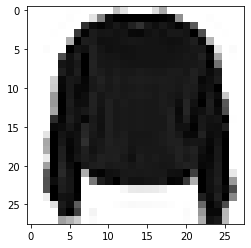

In [77]:
plt.imshow(train_images[7],cmap = plt.cm.binary)

In [0]:
# print(train_images[7])

In [0]:
train_images = train_images/255.0

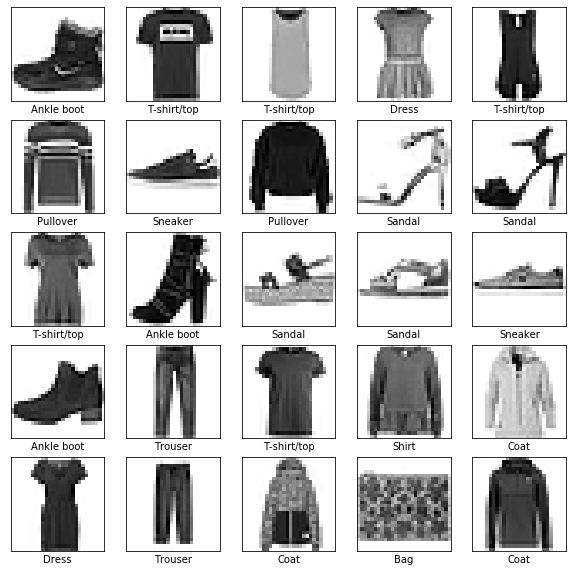

In [80]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()

In [0]:
# print(train_images[7])

In [0]:
test_images = test_images/255.0

In [0]:
# print(test_images[7])

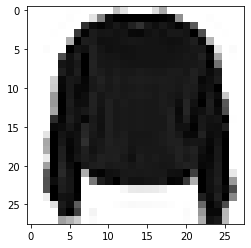

In [82]:
plt.imshow(train_images[7],cmap = plt.cm.binary)

Model Creation using keras

In [93]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax'),
    ])

model.compile(optimizer='SGD',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(train_images,train_lables,epochs = 5)
test_loss, test_acc = model.evaluate(test_images,test_lables)
print("Tested Acc : " ,test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.8265 - acc: 0.7222
Epoch 2/5
60000/60000 [==============================] - 4s 68us/sample - loss: 0.5745 - acc: 0.8062
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.5127 - acc: 0.8270
Epoch 4/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.4786 - acc: 0.8329
Epoch 5/5
10000/10000 [==============================] - 0s 45us/sample - loss: 0.4461 - acc: 0.8390
Tested Acc :  0.839


Using Model to make prediction

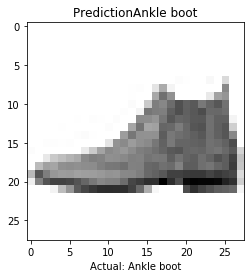

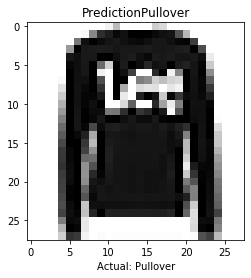

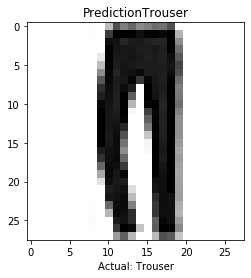

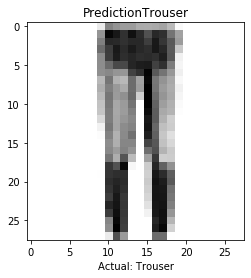

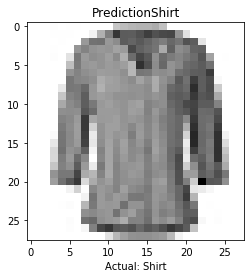

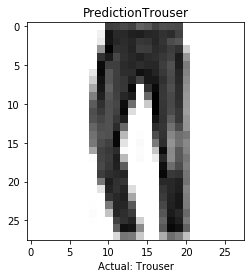

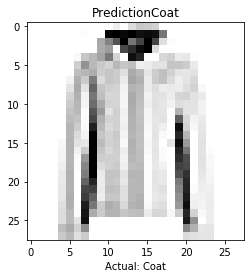

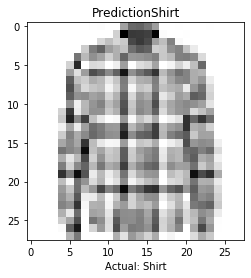

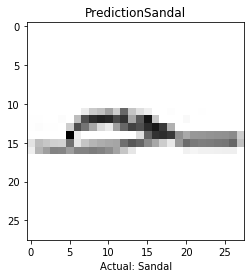

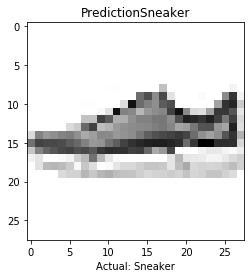

In [94]:
prediction = model.predict(test_images)

for i in range(10):
  plt.grid(False)
  plt.imshow(test_images[i] ,cmap = plt.cm.binary)
  plt.xlabel('Actual: '+ class_names[test_lables[i]])
  plt.title('Prediction'+ class_names[np.argmax(prediction[i])])
  plt.show()